In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        # We initialize weights to small random numbers
        # Weight size = number of inputs
        self.weights = np.random.randn(input_size) * 0.01
        self.bias = 0.0
        self.lr = lr
        self.epochs = epochs
        self.history = [] # To track errors for plotting later

    def activation_fn(self, x):
        # Heaviside Step Function: 1 if x >= 0, else 0
        return 1 if x >= 0 else 0

    def predict(self, x):
        # z = w1x1 + w2x2 + ... + b
        z = np.dot(x, self.weights) + self.bias
        return self.activation_fn(z)

    def train(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                # 1. Forward Pass
                prediction = self.predict(X[i])
                
                # 2. Calculate Error (Target - Predicted)
                error = y[i] - prediction
                total_error += abs(error)
                
                # 3. Update Rule (Weight adjustment)
                # If error is 0, weights don't change.
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
            
            self.history.append(total_error)
            
            # Stop early if the model has learned everything
            if total_error == 0:
                print(f"Converged at epoch {epoch}")
                break

print("Perceptron Class ready.")

Perceptron Class ready.


In [5]:
# Data for logic gates
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])

# Train for AND
print("Training AND Gate...")
model_and = Perceptron(input_size=2)
model_and.train(X, y_and)

# Train for OR
print("\nTraining OR Gate...")
model_or = Perceptron(input_size=2)
model_or.train(X, y_or)

# Quick Test
print("\nResults for AND Gate [1, 1]:", model_and.predict([1, 1]))
print("Results for OR Gate [0, 1]:", model_or.predict([0, 1]))

Training AND Gate...
Converged at epoch 5

Training OR Gate...
Converged at epoch 5

Results for AND Gate [1, 1]: 1
Results for OR Gate [0, 1]: 1


### Code explanation for the visualization
Think of it like this: We are asking the model to color every single pixel on the map based on whether it thinks that pixel belongs to Class 0 or Class 1.
Here is the step-by-step breakdown:
Step 1: Setting up the Map (The Grid)
code
Python
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Min/Max +/- 0.5: We don't want the data points to be right on the edge of the graph, so we add a little "padding" (0.5) to give the plot some breathing room.
np.arange(..., 0.02): This creates a list of numbers from the minimum to the maximum, stepping by 0.02. This is our "resolution." Just like the 400 we used before, this makes the boundary look smooth.
np.meshgrid: This is the magic line. It takes the X-axis values and Y-axis values and creates a coordinate for every single pixel in the area. If your graph is 2x2 inches, it creates a grid of thousands of dots.
Step 2: Asking the Model "What color is this pixel?"
code
Python
Z = np.array([model.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
xx.ravel(): This "flattens" the grid into a long list of coordinates.
The List Comprehension [...]: We loop through every single coordinate pair [x1, x2] in the grid and ask our model.predict() function: "Is this a 0 or a 1?"
Z.reshape(xx.shape): The model gives us a long list of answers. We reshape that list back into a grid shape (like a photo) so it matches our X and Y coordinates.
Step 3: Drawing the Result
code
Python
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.contourf: This is "Contour Filled." It fills the background with color.
Where Z is 0, it colors it one way (usually Blue).
Where Z is 1, it colors it another way (usually Red).
alpha=0.3: Makes the background colors light/faded so we can see the points on top.
plt.scatter: This draws your actual data points (the 4 points of the AND gate).
c=y: It colors the points based on their true values (0 or 1).
edgecolors='k': Puts a black border around the dots to make them look professional.

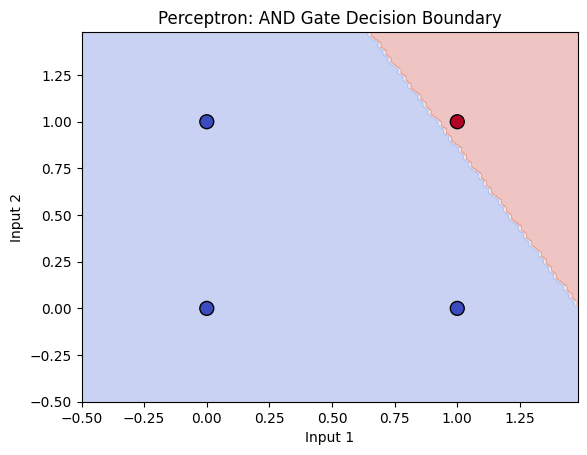

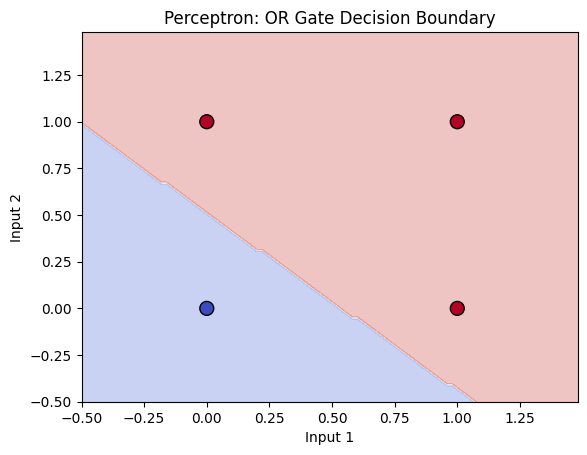

In [6]:
def plot_decision_boundary(model, X, y, title):
    # 1. Setup a grid of points to "color in" the background
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # 2. Predict for every point in the grid
    Z = np.array([model.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # 3. Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(model_and, X, y_and, "Perceptron: AND Gate Decision Boundary")
plot_decision_boundary(model_or, X, y_or, "Perceptron: OR Gate Decision Boundary")

Training XOR Gate...


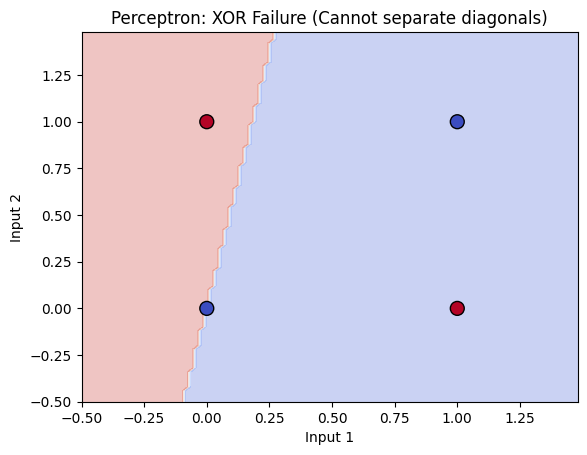

In [7]:
# Data for XOR (0,0->0, 0,1->1, 1,0->1, 1,1->0)
y_xor = np.array([0, 1, 1, 0])

print("Training XOR Gate...")
model_xor = Perceptron(input_size=2, epochs=50) # Give it 50 tries
model_xor.train(X, y_xor)

plot_decision_boundary(model_xor, X, y_xor, "Perceptron: XOR Failure (Cannot separate diagonals)")